In [2]:
import pandas as pd
import requests, json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Пиздим инфу

In [2]:
# Запрос для получения json
headers = '''
Host: auto.ru
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:88.0) Gecko/20100101 Firefox/88.0
Accept: */*
Accept-Language: ru-RU,ru;q=0.8,en-US;q=0.5,en;q=0.3
Accept-Encoding: gzip, deflate, br
Referer: https://auto.ru/cars/bmw/all/?page=3
x-client-app-version: bce8a8244b5
x-page-request-id: 328918ce0247597eaf5327bfb58fbbf0
x-client-date: 1621052424675
x-csrf-token: 46e8e9805b1aaeb0e7e8ed06e9e61db609f825f0374f514d
x-requested-with: fetch
content-type: application/json
Origin: https://auto.ru
Content-Length: 78
Connection: keep-alive
Cookie: autoru_sid=a%3Ag609e770a22hv5h9nuukn7hehqvu3kep.f63513a378b5f5c6208d35b64697caa2%7C1620997898875.604800.wyDgKeg1mlEd3UgRUP-bJA.67jb8JxaCRrLGKWbo9PTOIBxTdPMTL7-ErqZR1uTZ90; autoruuid=g609e770a22hv5h9nuukn7hehqvu3kep.f63513a378b5f5c6208d35b64697caa2; autoru_gdpr=1; suid=c18f94687848ae634a3e33b24dec6d0a.4fc40ee98cea6dd87fe788cb17ac994d; yuidlt=1; yandexuid=3854193761620997913; counter_ga_all7=2; crookie=An+ejc3GId86JbaHno+3yDpWbPhSpPl+/G5iLmug8RDpM4VJDMjLzHii5iDi/5MZT+TrlHvnUdD/Khj0WeuIogIWnpE=; cmtchd=MTYyMDk5NzkyNzY0NA==; _ym_uid=162099793885069073; _ym_d=1621052333; _ym_isad=2; cycada=1+Z/guXKzEVROtphAKfMJ/7TQUH18nTGnu0U0PuR/rk=; _ga=GA1.2.1678141264.1620998016; _gid=GA1.2.1513849119.1620998016; parts_ur=; _csrf_token=46e8e9805b1aaeb0e7e8ed06e9e61db609f825f0374f514d; from_lifetime=1621052333763; from=direct; X-Vertis-DC=vla; gdpr=0
Pragma: no-cache
Cache-Control: no-cache
'''.strip().split("\n")

# Преоб. запроса в словарь
dict_header = {}
for header in headers:
    key, value = header.split(': ')
    dict_header[key] = value
print(dict_header)

{'Host': 'auto.ru', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:88.0) Gecko/20100101 Firefox/88.0', 'Accept': '*/*', 'Accept-Language': 'ru-RU,ru;q=0.8,en-US;q=0.5,en;q=0.3', 'Accept-Encoding': 'gzip, deflate, br', 'Referer': 'https://auto.ru/cars/bmw/all/?page=3', 'x-client-app-version': 'bce8a8244b5', 'x-page-request-id': '328918ce0247597eaf5327bfb58fbbf0', 'x-client-date': '1621052424675', 'x-csrf-token': '46e8e9805b1aaeb0e7e8ed06e9e61db609f825f0374f514d', 'x-requested-with': 'fetch', 'content-type': 'application/json', 'Origin': 'https://auto.ru', 'Content-Length': '78', 'Connection': 'keep-alive', 'Cookie': 'autoru_sid=a%3Ag609e770a22hv5h9nuukn7hehqvu3kep.f63513a378b5f5c6208d35b64697caa2%7C1620997898875.604800.wyDgKeg1mlEd3UgRUP-bJA.67jb8JxaCRrLGKWbo9PTOIBxTdPMTL7-ErqZR1uTZ90; autoruuid=g609e770a22hv5h9nuukn7hehqvu3kep.f63513a378b5f5c6208d35b64697caa2; autoru_gdpr=1; suid=c18f94687848ae634a3e33b24dec6d0a.4fc40ee98cea6dd87fe788cb17ac994d; yuidlt=1; yandexuid=3854193

In [3]:
# адрес спизженный из мозилы, где находится json file
url = "https://auto.ru/-/ajax/desktop/listing/"

In [4]:
def parser(model, page_range):
    offers = []
    try:
        for x in range(1, page_range):
            param = {"color": ["FFD600", "660099", "DEA522", "007F00", "040001", "C49648", "CACECB", "EE1D19", "0000CC", "22A0F8", "FFC0CB", "4A2197", "FF8649", "200204", "97948F", "FAFBFB"],
                     "year_from": 1900, 
                     "year_to": 2021, 
                     "catalog_filter": [{"mark":model}], 
                     "damage_group": "ANY", 
                     'sort': "fresh_relevance_1-desc", #
                     "top_days":"900",#
                     "customs_state_group": "DOESNT_MATTER", 
                     "section": "all", 
                     "category": "cars",
                     "page":x
                    }
#             param = {"category":"cars",
#                      "section":"all",
#                      "page":x,
#                      "catalog_filter":[{"mark":model}]}
            response = requests.post(
                url, json=param, headers=dict_header)  # тырим json
            print(response.status_code)  # Статус запроса
            data = response.json()  # извлекаем стыренное
            # берем из json только оферы на тачки. Мусор не берем
            offers.extend(data['offers'])
            print(f'Current_page: {x}')  # Стата по страницам
    except:
        print('Fail')
    with open(f'data_{model}.json', 'w') as f:
        json.dump(offers, f)
    print(f'File "data_{model}" is ready')
    

In [5]:
brand_list = ['BMW',
#               'VOLKSWAGEN',
#               'NISSAN',
#               'MERCEDES',
#               'TOYOTA',
#               'AUDI',
#               'MITSUBISHI',
#               'SKODA',
#               'VOLVO',
#               'HONDA',
#               'INFINITI',
#               'LEXUS',
#               'FORD',
#               'KIA',
#               'HYUNDAI',
#               'MAZDA',
#               'RENO',
#               'Peugeot'
]

In [7]:
for i in brand_list:
    parser(i,10)

200
Current_page: 1
200
Current_page: 2
200
Current_page: 3
200
Current_page: 4
200
Current_page: 5
200
Current_page: 6
200
Current_page: 7
200
Current_page: 8
200
Current_page: 9
File "data_BMW" is ready


# Обрабатываем спизженное

In [5]:
cols = ['bodyType', 'brand', 'car_url', 'color', 'complectation_dict',
       'description', 'engineDisplacement', 'enginePower', 'equipment_dict',
       'fuelType', 'image', 'mileage', 'modelDate', 'model_info', 'model_name',
       'name', 'numberOfDoors', 'parsing_unixtime', 'priceCurrency',
       'productionDate', 'sell_id', 'super_gen', 'vehicleConfiguration',
       'vehicleTransmission', 'vendor', 'Владельцы', 'Владение', 'ПТС',
       'Привод', 'Руль', 'Состояние', 'Таможня','price']#'price_segment'

In [1]:
def get_df(parsed_json):
    df = pd.DataFrame(data=None,columns=cols,index = range(len(parsed_json)))
    NaN = np.nan
    for i, vehicle in enumerate(parsed_json):
        try:
            df.loc[i]['color'] = vehicle['color_hex']
        except:
            df.loc[i]['color'] = NaN
        try:
            df.loc[i].brand = vehicle['vehicle_info']['mark_info']['name']
        except:
            df.loc[i].brand = NaN
        try:
            df.loc[i].complectation_dict = vehicle['vehicle_info']['complectation']
        except:
            df.loc[i].complectation_dict = NaN
        try:
            df.loc[i].engineDisplacement = vehicle['vehicle_info']['tech_param']['displacement']
        except:
            df.loc[i].engineDisplacement = NaN
        try:
            df.loc[i].enginePower = vehicle['vehicle_info']['tech_param']['power']
        except:
            df.loc[i].enginePower = NaN
        try:
            df.loc[i].equipment_dict = vehicle['vehicle_info']['equipment']
        except:
            df.loc[i].equipment_dict = NaN
        try:
            df.loc[i].fuelType = vehicle['lk_summary'].split(',')[-1]
        except:
            df.loc[i].fuelType = NaN
        try:
            df.loc[i].image = vehicle['state']['image_urls'][0]['sizes']['1200x900n']
        except:
            df.loc[i].image = NaN
        try:
            df.loc[i].mileage = vehicle['state']['mileage']
        except:
            df.loc[i].mileage = NaN
        try:
            df.loc[i].modelDate = vehicle['vehicle_info']['super_gen']['year_from']
        except:
            df.loc[i].modelDate = NaN
        try:
            df.loc[i].model_info = vehicle['vehicle_info']['model_info']
        except:
            df.loc[i].model_info = NaN
        try:
            df.loc[i].model_name = vehicle['vehicle_info']['model_info']['code']
        except:
            df.loc[i].model_name = NaN
        try:
            df.loc[i]['name'] = vehicle['vehicle_info']['tech_param']['human_name']
#             df.loc[i]['name'] = vehicle['lk_summary']  # !!!!!!!!!!!!!!!!!!!
        except:
            df.loc[i]['name'] = NaN
        try:
            df.loc[i].numberOfDoors = vehicle['vehicle_info']['configuration']['doors_count']
        except:
            df.loc[i].numberOfDoors = NaN
        try:
            df.loc[i].parsing_unixtime = 'today'
        except:
            df.loc[i].parsing_unixtime = NaN
        try:
            df.loc[i].productionDate = vehicle['documents']['year']
        except:
            df.loc[i].productionDate = NaN
        try:
            df.loc[i].sell_id = vehicle['id']
        except:
            df.loc[i].sell_id = NaN
        try:
            df.loc[i].super_gen = vehicle['vehicle_info']['tech_param'] #!!!
        except:
            df.loc[i].super_gen = NaN
        try:
            df.loc[i].vehicleConfiguration = 'useless_col'
        except:
            df.loc[i].vehicleConfiguration = NaN
        try:
            df.loc[i].vehicleTransmission = vehicle['vehicle_info']['tech_param']['transmission']
        except:
            df.loc[i].vehicleTransmission = NaN
        try:
            df.loc[i].vendor = vehicle['vehicle_info']['vendor']
        except:
            df.loc[i].vendor = NaN
        try:
            df.loc[i].Владение = vehicle['documents']['purchase_date'] #!!!
        except:
            df.loc[i].Владение = NaN
        try:
            df.loc[i].Привод = vehicle['lk_summary'].split(',')[2]
        except:
            df.loc[i].Привод = NaN
        try:
            df.loc[i].Состояние = vehicle['state']['state_not_beaten']
        except:
            df.loc[i].Состояние = NaN
        try:
            df.loc[i].Таможня = vehicle['documents']['custom_cleared']
        except:
            df.loc[i].Таможня = NaN
#         try:
#             df.loc[i].price_segment = vehicle['vehicle_info']['super_gen']['price_segment']
#         except:
#             df.loc[i].price_segmen = NaN
        try:
            df.loc[i].bodyType = vehicle['vehicle_info']['configuration']['human_name']
        except:
            df.loc[i].bodyType = NaN
        try:
            df.loc[i].description = vehicle['description']
        except:
            df.loc[i].description = NaN
        try:
            df.loc[i].Владельцы = vehicle['documents']['owners_number']
        except:
            df.loc[i].Владельцы = NaN
        try:
            df.loc[i].price = vehicle['price_info']['price']
        except:
            df.loc[i].price = NaN
        try:
            df.loc[i].priceCurrency = vehicle['price_info']['currency']
        except:
            df.loc[i].priceCurrency = NaN
        try:
            df.loc[i].ПТС = vehicle['documents']['pts']
        except:
            df.loc[i].ПТС = NaN
        try:
            df.loc[i].Руль = vehicle['vehicle_info']['steering_wheel']
        except:
            df.loc[i].Руль = NaN
            
    return df

In [3]:
def get_train(car_name):
    df = pd.DataFrame(data=None)
    with open (f'data_{car_name}.json', 'r', encoding='utf8') as f:
        data = json.load(f)
    df = get_df(data)
    return df

In [6]:
AUDI = get_train('AUDI')
BMW = get_train('BMW')
HONDA = get_train('HONDA')
INFINITI = get_train('INFINITI')
LEXUS = get_train('LEXUS')
MERCEDES = get_train('MERCEDES')
MITSUBISHI = get_train('MITSUBISHI')
NISSAN = get_train('NISSAN')
SKODA = get_train('SKODA')
TOYOTA = get_train('TOYOTA')
VOLKSWAGEN = get_train('VOLKSWAGEN')
FORD = get_train('FORD')
HYUNDAI = get_train('HYUNDAI')
KIA = get_train('KIA')
VOLVO = get_train('VOLVO')
MAZDA = get_train('MAZDA')
RENO = get_train('RENO')
Peugeot = get_train('Peugeot')


In [7]:
df_list = [BMW,
           VOLKSWAGEN,NISSAN,
           MERCEDES,TOYOTA,AUDI,
           MITSUBISHI,SKODA,VOLVO,
           HONDA,INFINITI,LEXUS,
           FORD,KIA,HYUNDAI,MAZDA,RENO,Peugeot]
df = pd.concat(df_list, sort=False)

bodyType - 0%
brand - 0%
car_url - 100%
color - 0%
complectation_dict - 0%
description - 2%
engineDisplacement - 0%
enginePower - 0%
equipment_dict - 0%
fuelType - 0%
image - 4%
mileage - 0%
modelDate - 0%
model_info - 0%
model_name - 0%
name - 0%
numberOfDoors - 0%
parsing_unixtime - 0%
priceCurrency - 1%
productionDate - 0%
sell_id - 0%
super_gen - 0%
vehicleConfiguration - 0%
vehicleTransmission - 0%
vendor - 0%
Владельцы - 17%
Владение - 83%
ПТС - 1%
Привод - 0%
Руль - 0%
Состояние - 1%
Таможня - 1%
price - 1%


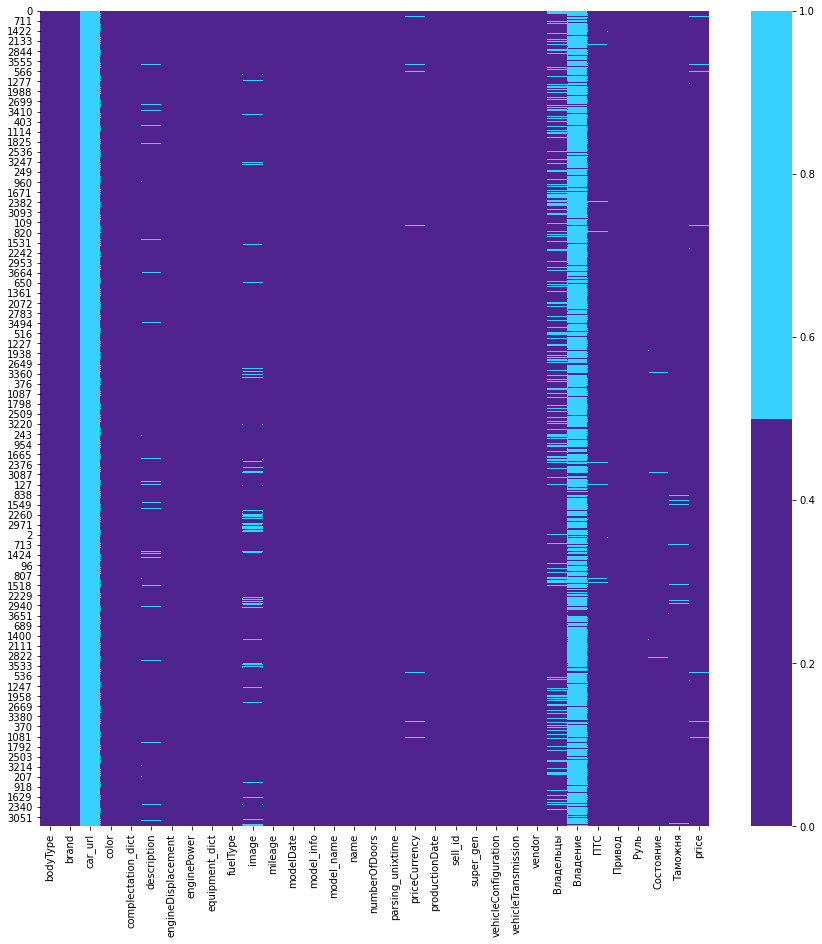

In [9]:
# Plot missing values
colors = ['#50248f', '#38d1ff']
cols = df.columns
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

# Show in percents
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing*100)}%')

In [ ]:
# colors = {'FFD600':'Жёлтый',
#           "660099":'Пурпурный',
#           "DEA522":'Золотистый',
#           "007F00":'Зелёный',
#           "040001":'Чёрный',
#           "C49648":'Бежевый',
#           "CACECB":'Серебристый',
#           "EE1D19":'Красный',
#           "0000CC":'Синий',
#           "22A0F8":'Голубой',
#           "FFC0CB":'Розовый',
#           "4A2197":'Фиолетовый',
#           "FF8649":'Оранжевый',
#           "200204":'Коричневый',
#           "97948F":'Серый',
#           "FAFBFB":'Белый'}

In [ ]:
# df['color'] = df['color'].map(colors)

In [10]:
df.to_csv('train_parsed_20_05_21.csv', index = False)

### уДАЛИТЬ

In [102]:
columns = {
    'bodyType': 'body_type',
    'engineDisplacement': 'engine_displacement',
    'enginePower': 'engine_power',
    'fuelType': 'fuel_type',
    'modelDate': 'model_date',
    'numberOfDoors': 'doors_count',
    'priceCurrency': 'price_currency',
    'productionDate': 'production_date',
    'vehicleConfiguration': 'vehicle_configuration',
    'vehicleTransmission': 'vehicle_transmission',
    'Владельцы': 'owner_count',
    'Владение': 'owning_period',
    'ПТС': 'car_passport',
    'Привод': 'wheel_drive',
    'Руль': 'wheel_location',
    'Состояние': 'condition',
    'Таможня': 'custom'
}

In [104]:
df_train = pd.read_csv('train_parsed_20_05_21.csv')

In [105]:
df_train

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,...,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня,price
0,Седан,BMW,NaN,FAFBFB,{'id': '0'},Здравствуйте!\nПродаю BMW 318i (рестайлинг). Я...,1499.0,136.0,"{'cruise-control': True, 'asr': True, 'tinted-...",бензин,...,AUTOMATIC,EUROPEAN,2.0,useless_col,ORIGINAL,задний,LEFT,True,True,1499999.0
1,Внедорожник 5 дв.,BMW,NaN,040001,{'id': '0'},"Продаю свой х3 , вписан в птс , птс оригинал ,...",1997.0,184.0,"{'asr': True, 'tinted-glass': True, 'esp': Tru...",бензин,...,AUTOMATIC,EUROPEAN,3.0,useless_col,ORIGINAL,полный,LEFT,True,True,1680000.0
2,Седан,BMW,NaN,040001,{'id': '0'},Продам BMW 3 серия 2004 год / 2 литра АВТОМАТ....,1995.0,143.0,"{'asr': True, 'tinted-glass': True, 'esp': Tru...",бензин,...,AUTOMATIC,EUROPEAN,4.0,useless_col,ORIGINAL,задний,LEFT,True,True,465000.0
3,Седан,BMW,NaN,FAFBFB,"{'id': '22218349', 'name': '520d xDrive Busine...",———————————————————————————\nФУНКЦИОНАЛЬНОЕ ОБ...,1995.0,190.0,"{'cruise-control': True, 'asr': True, 'esp': T...",дизель,...,AUTOMATIC,EUROPEAN,NaN,useless_col,ORIGINAL,полный,LEFT,True,True,4551000.0
4,Купе,BMW,NaN,007F00,"{'id': '21784048', 'name': 'M4 Competition', '...","Авто в идеальном состоянии, полный заводской с...",2979.0,450.0,"{'cruise-control': True, 'asr': True, 'tinted-...",бензин,...,ROBOT,EUROPEAN,2.0,useless_col,ORIGINAL,задний,LEFT,True,True,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57513,Седан,Mazda,NaN,97948F,{'id': '0'},"ОТС. Без вложений, двигатель шепчет, масло от ...",1999.0,145.0,{},бензин,...,AUTOMATIC,JAPANESE,3.0,useless_col,ORIGINAL,передний,RIGHT,True,True,360000.0
57514,Седан,Mazda,NaN,0000CC,{'id': '0'},"Тачка огонь, технически исправна, вложений не ...",1840.0,131.0,{},бензин,...,AUTOMATIC,JAPANESE,3.0,useless_col,ORIGINAL,передний,RIGHT,True,True,118000.0
57515,Хэтчбек 5 дв.,Mazda,NaN,0000CC,{'id': '0'},"Авто в хорошем состоянии, торг уместен",1323.0,63.0,{},бензин,...,MECHANICAL,JAPANESE,4.0,useless_col,ORIGINAL,передний,LEFT,True,True,130000.0
57516,Седан,Mazda,NaN,660099,{'id': '0'},"Автомобиль в хорошем состоянии, замена сцеплен...",1798.0,120.0,"{'front-centre-armrest': True, 'abs': True, 'e...",бензин,...,MECHANICAL,JAPANESE,4.0,useless_col,ORIGINAL,передний,LEFT,True,True,460000.0


In [106]:
df_train.rename(columns=columns,inplace=True)

In [107]:
df_train['engine_displacement'] = round(df_train['engine_displacement']/1000, 1)

In [108]:
df_train['owner_count'] = df_train['owner_count'].map({1.0:'1',2.0:'2',3.0:'3',4.0:'3'}).astype('category')

In [109]:
def missing_vars(data, column, random_proba=True):
    '''Function is called for filling of missing data'''
    # With using probability and random choise

    if random_proba:
        col_name = data[column].value_counts().index.to_list(
        )  # get list of values
        col_distr = data[column].value_counts(
            normalize=True).values  # get l;ist of probs
        missing = data[col].isnull()  # flag of missing val
        # substitute values from the list of names in accordance with the probability of meeting the name
        data.loc[missing, [column]] = np.random.choice(col_name,
                                                    size=len(data[missing]),
                                                    p=col_distr)

    # Using  most common in  column
    data[col] = data[col].fillna(data[col].value_counts().index[0])

In [110]:
cols_to_int64 = ['model_date', 'doors_count']

for col in cols_to_int64:
    missing_vars(df_train, col)
    df_train[col] = df_train[col].astype('int64')

In [111]:
df_train['body_type'] = list(str(x).lower().replace('.','') for x in df_train['body_type'])

In [112]:
df_train.duplicated(keep='first').sum()

538

In [113]:
dubl = df_train[df_train.duplicated(keep=False)]